In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from datetime import datetime
from sklearn import metrics
from statsmodels.tsa.ar_model import AutoReg
from numpy import sqrt
from sklearn.metrics import mean_squared_error

In [146]:
superstore_data = pd.read_csv("/Users/theranmeadows/Desktop/Bellevue University/dsc630predictiveAnalytics/project/superstore - data - superstore - superstore.csv")
superstore_data

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,2,Order.Date,Order.ID,...,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum,Month
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,00:00.0,CA-2011-130813,...,Consumer,00:00.0,Second Class,4.37,California,Paper,2011,North America,2,January
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,00:00.0,CA-2011-148614,...,Consumer,00:00.0,Standard Class,0.94,California,Paper,2011,North America,4,January
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,00:00.0,CA-2011-118962,...,Consumer,00:00.0,Standard Class,1.81,California,Paper,2011,North America,32,July
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,00:00.0,CA-2011-118962,...,Consumer,00:00.0,Standard Class,4.59,California,Paper,2011,North America,32,July
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,00:00.0,CA-2011-146969,...,Consumer,00:00.0,Standard Class,1.32,California,Paper,2011,North America,40,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,Office Supplies,Los Angeles,United States,AM-103604,Alice McCarthy,0.2,US,1,00:00.0,CA-2014-109701,...,Corporate,00:00.0,Same Day,5.15,California,Binders,2014,North America,49,November
51286,Office Supplies,Los Angeles,United States,AM-103604,Alice McCarthy,0.2,US,1,00:00.0,CA-2014-109701,...,Corporate,00:00.0,Same Day,0.44,California,Binders,2014,North America,49,November
51287,Office Supplies,Los Angeles,United States,HR-147704,Hallie Redmond,0.2,US,1,00:00.0,CA-2014-106964,...,Home Office,00:00.0,First Class,0.31,California,Binders,2014,North America,51,December
51288,Office Supplies,Los Angeles,United States,RM-196754,Robert Marley,0.2,US,1,00:00.0,CA-2014-145219,...,Home Office,00:00.0,First Class,15.95,California,Binders,2014,North America,52,December


In [111]:
# Keep the columns I will use for this project
superstore_data = superstore_data[['Category', 'Profit', 'Year', 'Month']]
superstore_data.head()

,Category,Profit,Year,Month
0,Office Supplies,9.3312,2011,January
1,Office Supplies,9.2928,2011,January
2,Office Supplies,9.8418,2011,July
3,Office Supplies,53.2608,2011,July
4,Office Supplies,3.1104,2011,September


In [112]:
# check for null values
superstore_data.isnull().sum()

Category    0
Profit      0
Year        0
Month       0
dtype: int64

In [113]:
# showing the 'Profit' column in 1000s

superstore_data['Profit'] = superstore_data['Profit'] * 1000

In [114]:
# Assign number to the month names
superstore_data['Month'] = superstore_data['Month'].map({'January': 1,
                                                         'February': 2,
                                                         'March': 3,
                                                         'April': 4,
                                                         'May':5,
                                                         'June':6,
                                                         'July':7,
                                                         'August':8,
                                                         'September':9,
                                                         'October':10,
                                                         'November':11,
                                                         'December':12})

In [115]:
# Create a Date column that combines "Year" and "Month" columns.
superstore_data['Date']=pd.to_datetime(superstore_data[['Year','Month']].assign(DAY = 1))

In [116]:
# Preview the data so far
superstore_data.head()

,Category,Profit,Year,Month,Date
0,Office Supplies,9331.2,2011,1,2011-01-01
1,Office Supplies,9292.8,2011,1,2011-01-01
2,Office Supplies,9841.8,2011,7,2011-07-01
3,Office Supplies,53260.8,2011,7,2011-07-01
4,Office Supplies,3110.4,2011,9,2011-09-01


In [117]:
# check for null values
superstore_data.isnull().sum()

Category    0
Profit      0
Year        0
Month       0
Date        0
dtype: int64

In [118]:
# Clean the data up

superstore_data_clean = superstore_data[['Date','Profit']].sort_values('Date')
superstore_data_clean = superstore_data_clean.dropna()
superstore_timeindex = pd.DatetimeIndex(superstore_data_clean['Date'].values)
superstore_data_clean = superstore_data_clean.set_index(superstore_timeindex)

In [119]:
superstore_data_clean['Date'] = pd.to_datetime(superstore_data_clean['Date'])

In [120]:
superstore_data_clean.drop('Date', axis = 1, inplace = True)

In [122]:
superstore_data_clean['Profit'].resample('MS').mean()

2011-01-01    18601.796290
2011-02-01    32488.951489
2011-03-01    30142.996962
2011-04-01    22309.960350
2011-05-01    25801.063188
2011-06-01    21799.460758
2011-07-01    12198.678032
2011-08-01    32069.375389
2011-09-01    33913.897477
2011-10-01    33175.807179
2011-11-01    31009.181621
2011-12-01    29697.911755
2012-01-01    23498.002664
2012-02-01    29520.161429
2012-03-01    27609.594925
2012-04-01    26522.743963
2012-05-01    33939.647384
2012-06-01    31982.775043
2012-07-01    29056.729257
2012-08-01    38576.063281
2012-09-01    24294.356829
2012-10-01    29463.105603
2012-11-01    21292.898742
2012-12-01    25519.407046
2013-01-01    33648.239132
2013-02-01    38498.318413
2013-03-01    29901.262688
2013-04-01    23663.190890
2013-05-01    25703.881971
2013-06-01    30440.577051
2013-07-01    33042.128722
2013-08-01    19714.554253
2013-09-01    29203.121267
2013-10-01    30807.425428
2013-11-01    29149.079092
2013-12-01    33904.663655
2014-01-01    32337.888831
2

Text(0, 0.5, 'Sales (million)')

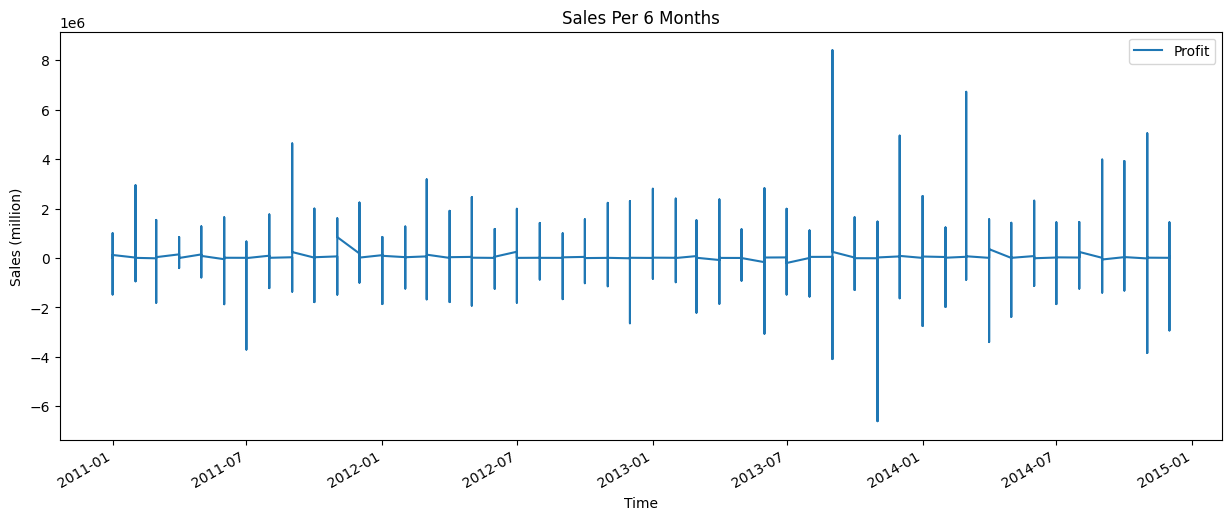

In [139]:
superstore_data_clean.plot(figsize=(15, 6))
plt.title("Sales Per 6 Months")
plt.xlabel("Time")
plt.ylabel("Sales (million)")
#plt.show()

In [131]:
# spliting the data into test and train

train_df = superstore_data_clean[superstore_data_clean.index < '2012-01-01']
test_df = superstore_data_clean[superstore_data_clean.index >= '2012-01-01']

In [132]:
test_df

,Profit
2012-01-01,114300.0
2012-01-01,8955.0
2012-01-01,5264.0
2012-01-01,-984.0
2012-01-01,-6660.0
...,...
2014-12-01,185400.0
2014-12-01,57180.0
2014-12-01,719850.0
2014-12-01,135360.0


In [133]:
# Building a predictive time model

time_model = AutoReg(train_df, lags=5).fit()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [134]:
time_predictions = time_model.predict(start = len(train_df), end = (len(superstore_data_clean)-1),dynamic = False)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


Text(0, 0.5, 'Sales (million)')

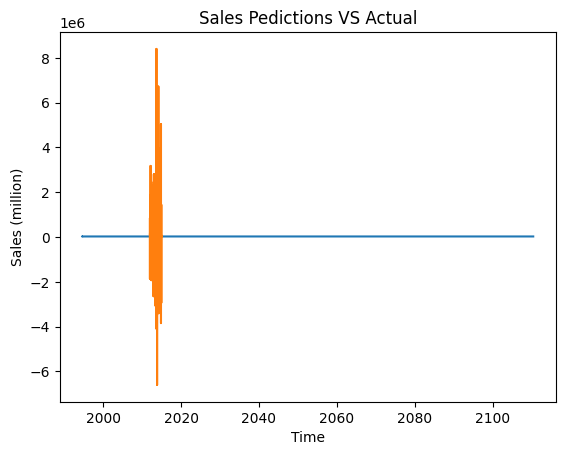

In [144]:
plt.plot(time_predictions)
plt.plot(test_df)
plt.title("Sales Pedictions VS Actual")
plt.xlabel("Time")
plt.ylabel("Sales (million)")

In [136]:
rmse = sqrt(mean_squared_error(test_df, time_predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 175192.294
